In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('Data.csv')
data1= pd.read_csv('Data.csv')
data2= pd.read_csv('Data.csv')

In [3]:
data.head(20)


,gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [4]:
data.isnull().sum()


gender                      0
Nationality                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentSurvey                0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [5]:
categorical_features = (data.select_dtypes(include=['object']).columns.values)
categorical_features

array(['gender', 'Nationality', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'], dtype=object)

In [6]:
numerical_features = data.select_dtypes(include = ['float64', 'int64']).columns.values
numerical_features

array(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'], dtype=object)

### Now we will analyze categorical data in order to gain more insights


#### Let's do chi test to determine the p-value(level of marginal significance within a statistical hypothesis test representing the probability of the occurrence of a given even)

In [7]:
csq=chi2_contingency(pd.crosstab(data['Class'], data['AnnouncementsView']))
print("P-value: AnnouncementsView",csq[1])
csq1=chi2_contingency(pd.crosstab(data['Class'], data['VisITedResources']))
print("P-value: VisITedResources",csq1[1])
csq2=chi2_contingency(pd.crosstab(data['Class'], data['raisedhands']))
print("P-value: raisedhands",csq2[1])
csq3=chi2_contingency(pd.crosstab(data['Class'], data['Discussion']))
print("P-value: Discussion",csq3[1])
csq4=chi2_contingency(pd.crosstab(data['Class'], data['ParentschoolSatisfaction']))
print("P-value: ParentschoolSatisfaction",csq4[1])
csq5=chi2_contingency(pd.crosstab(data['Class'], data['StudentAbsenceDays']))
print("P-value: StudentAbsenceDays",csq5[1])
csq6=chi2_contingency(pd.crosstab(data['Class'], data['Relation']))
print("P-value: Relation",csq6[1])
csq7=chi2_contingency(pd.crosstab(data['Class'], data['ParentSurvey']))
print("P-value: ParentSurvey",csq7[1])
csq8=chi2_contingency(pd.crosstab(data['Class'], data['gender']))
print("P-value: gender",csq8[1])
csq9=chi2_contingency(pd.crosstab(data['Class'], data['Nationality']))
print("P-value: Nationality",csq9[1])
csq9_1=chi2_contingency(pd.crosstab(data['Class'], data['PlaceofBirth']))
print("P-value: PlaceofBirth",csq9_1[1])
csq9_2=chi2_contingency(pd.crosstab(data['Class'], data['Semester']))
print("P-value: Semester",csq9_2[1])
csq9_3=chi2_contingency(pd.crosstab(data['Class'], data['GradeID']))
print("P-value: GradeID",csq9_3[1])
csq9_4=chi2_contingency(pd.crosstab(data['Class'], data['SectionID']))
print("P-value: SectionID",csq9_4[1])


P-value: AnnouncementsView 4.52692103377e-10
P-value: VisITedResources 9.86230536617e-18
P-value: raisedhands 2.21008024231e-17
P-value: Discussion 0.00158102166243
P-value: ParentschoolSatisfaction 1.35529337504e-15
P-value: StudentAbsenceDays 1.25139609278e-49
P-value: Relation 2.14633296685e-18
P-value: ParentSurvey 1.95807572057e-21
P-value: gender 5.79828805474e-08
P-value: Nationality 1.80227245822e-06
P-value: PlaceofBirth 1.01182597237e-06
P-value: Semester 0.0200239901151
P-value: GradeID 0.0482187992655
P-value: SectionID 0.349792638946


#### From above obeservations we see that the p-value for all observations passed the null hypothesis test,But further exploratory analysis can tell more insights.

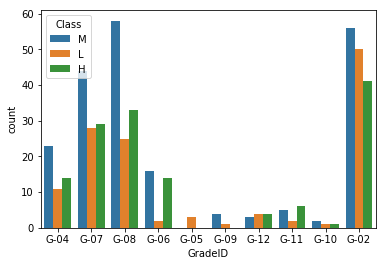

In [8]:
sns.countplot(x='GradeID',hue='Class',data=data)

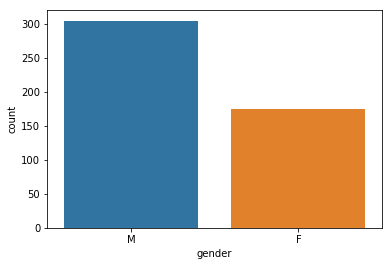

In [9]:
sns.countplot(x='gender',data=data)

#### We can see that in some gradeid the number of High class students are more,which suggests that there is an impact of gradeID on Class

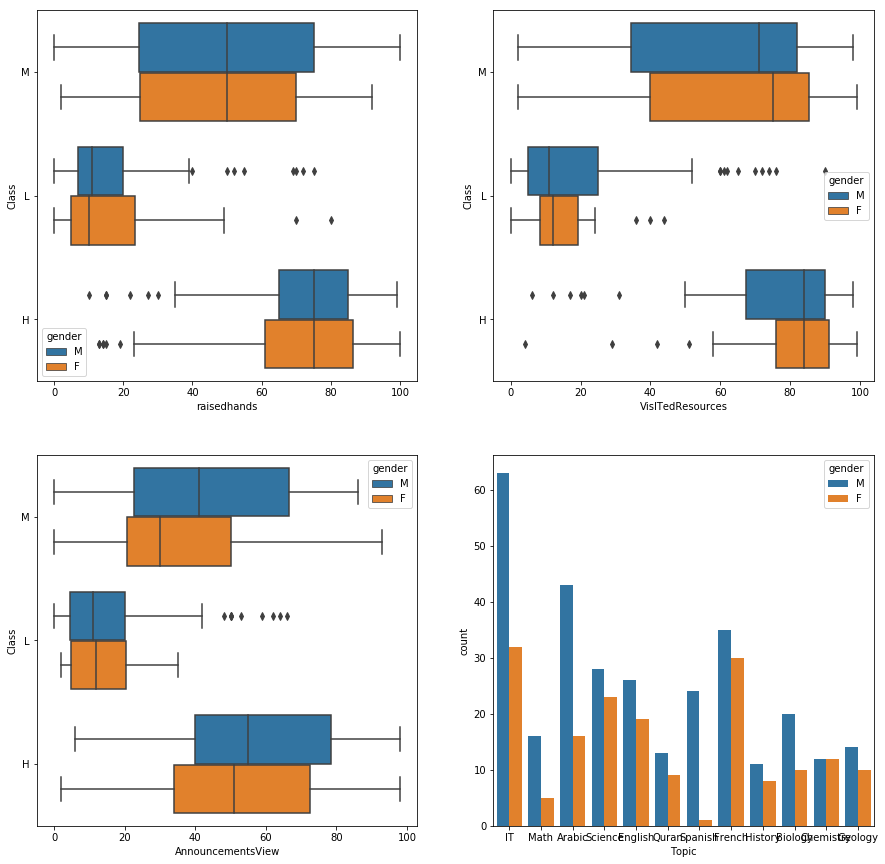

In [10]:
fig, axarr  = plt.subplots(2,2,figsize=(15,15))
sns.boxplot(x='raisedhands', y='Class',hue='gender', data=data,ax=axarr[0,0])
sns.boxplot(x='VisITedResources', y='Class',hue='gender',data=data,ax=axarr[0,1])
sns.boxplot(x='AnnouncementsView',y='Class',hue='gender',data=data,ax=axarr[1,0])
sns.countplot(x='Topic',hue='gender',data=data,ax=axarr[1,1])

#### The gender is not biased ,as we can see from the above plots, the gender maybe dominating against some features but overall there is no bias .Also Pvalue is very low for gender making it a right variable for prediction

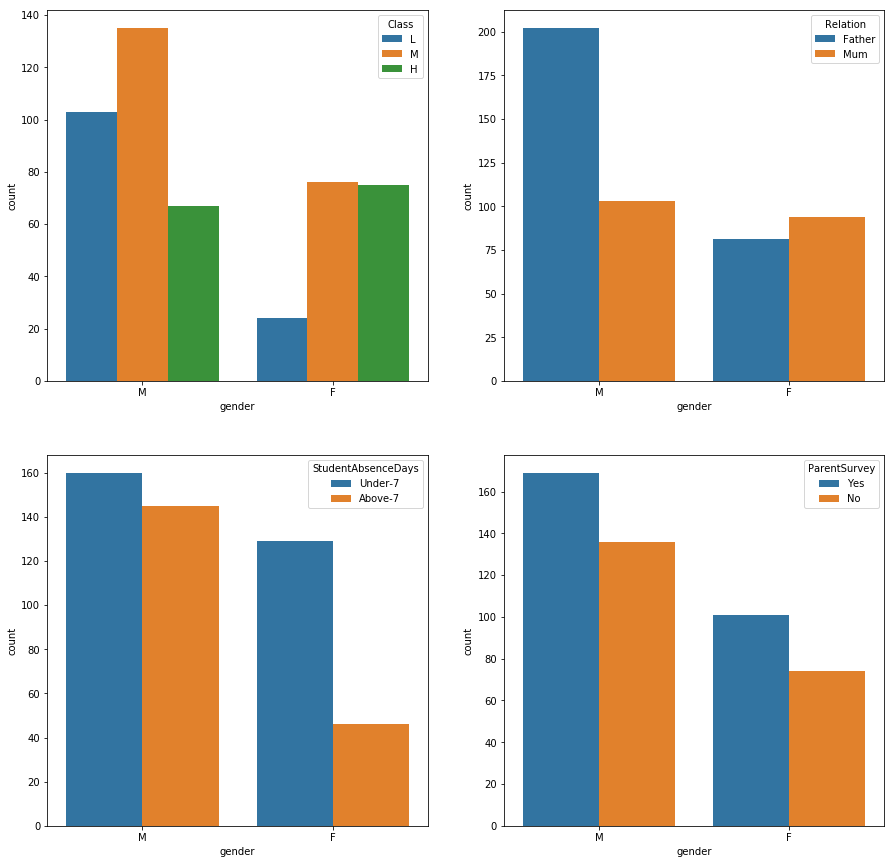

In [11]:
fig, axarr  = plt.subplots(2,2,figsize=(15,15))
sns.countplot(x='gender', hue='Class', data=data, ax=axarr[0,0], order=['M','F'], hue_order=['L','M','H'])
sns.countplot(x='gender', hue='Relation', data=data, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='gender', hue='StudentAbsenceDays', data=data, ax=axarr[1,0], order=['M','F'])
sns.countplot(x='gender', hue='ParentSurvey', data=data, ax=axarr[1,1], order=['M','F'])

#### from the counts plots above we can see major difference in gender counts towards different features,it is found that girls have higher counts of high level class and in certain cases male dominate in counts,against features like relationship with father and in both above but this is understandable since the male population dominates that of female.

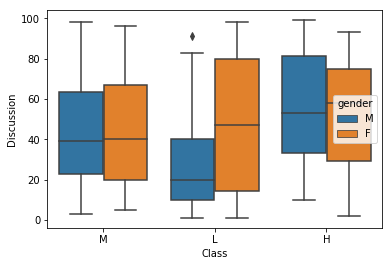

In [12]:
sns.boxplot(x='Class', y='Discussion', hue='gender',data=data)

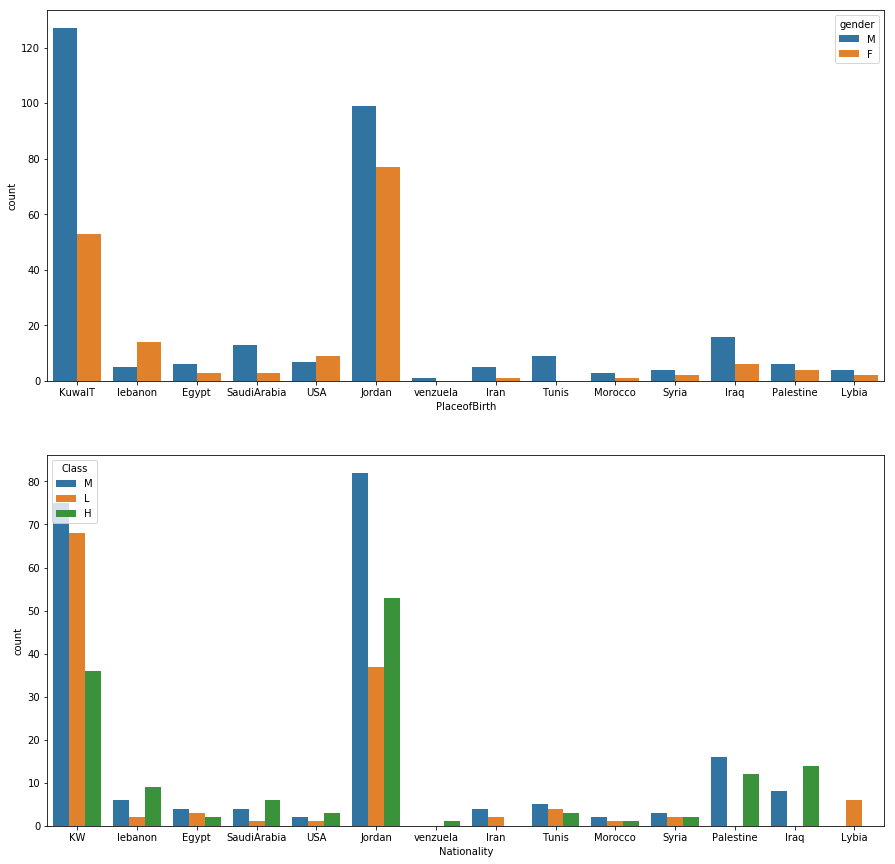

In [13]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(15,15))
sns.countplot(x='PlaceofBirth', hue='gender', data=data,ax=axis1)
sns.countplot(x='Nationality', hue='Class', data=data,ax=axis2)

#### In the above plots we can see that people from kuwait ,jordan and plaestine perfom very well and have many medium and high class students compared to other countries and also there is very less low class members from iraq,and palestine which clears our intuition that some students from certain countries perform very well and the country dataset could be very well considered for prediction

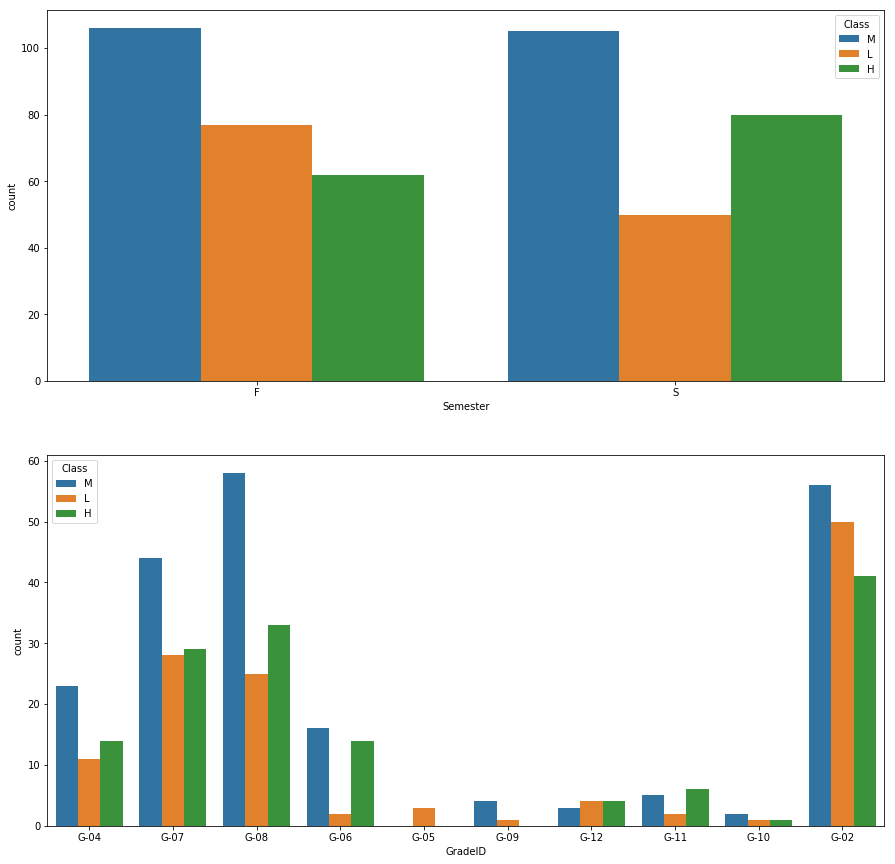

In [14]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(15,15))
sns.countplot(x='Semester', hue='Class', data=data,ax=axis1)
sns.countplot(x='GradeID', hue='Class', data=data,ax=axis2)

#### The semester variable can also play a key role in prediction as we can observe the Low class students rate reduces and high class students rate increasing as they move on to next semester in the above plots.

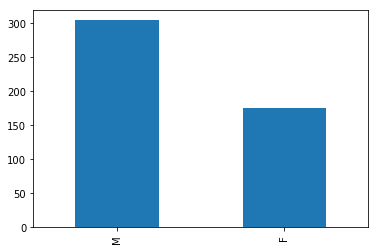

In [15]:
data['gender'].value_counts().plot(kind='bar')

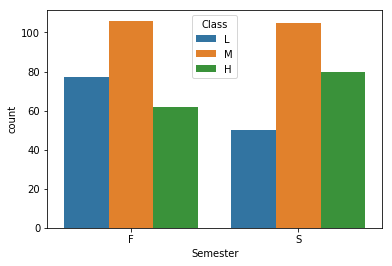

In [16]:
data['Semester'].value_counts()
sns.countplot(x='Semester',hue='Class',order=['F','S'], hue_order=['L','M','H'] ,data=data)

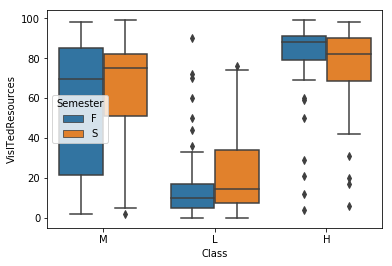

In [17]:
sns.boxplot( x= 'Class',y= 'VisITedResources', hue='Semester',data=data)

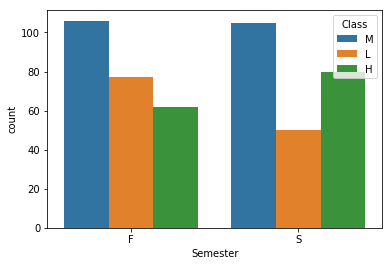

In [18]:
sns.countplot(x='Semester', hue='Class',data=data)

#### From the above plots we can see that the high and low class student visits more on their second semester but the medium class students visit the resources less than in the first semester,this suggests that high class and low class students work more hard in the second semester  and medium class students reduces the usage of visitedresource.The second plot also shows decrease in low and increase in high class suggesting that semsters and visitedresources play key role in prediction

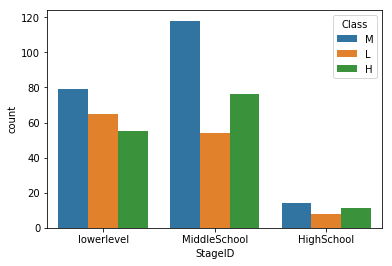

In [19]:
sns.countplot(x='StageID',hue='Class',data=data)

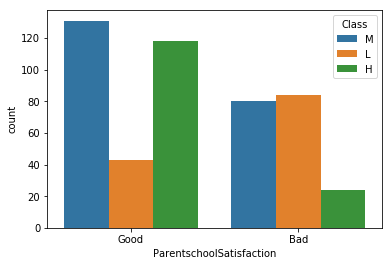

In [20]:
sns.countplot(x='ParentschoolSatisfaction',hue='Class', data=data)

#### from the above plot we can see that the parentschool satisfaction directly impacts the Class of the students

### Now we will start with data preprocessing

In [21]:
data.head()

,gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [22]:
one_hot = pd.get_dummies(data['gender'])
one_hot1= pd.get_dummies(data['Relation'])
one_hot2= pd.get_dummies(data['ParentschoolSatisfaction'])
one_hot3= pd.get_dummies(data['StudentAbsenceDays'])
one_hot4= pd.get_dummies(data['StageID'])
one_hot5= pd.get_dummies(data['ParentSurvey'])
one_hot6=  pd.get_dummies(data['ParentschoolSatisfaction'])
one_hot7=  pd.get_dummies(data['Semester'])
one_hot8= pd.get_dummies(data['GradeID'])
one_hot9= pd.get_dummies(data['SectionID'])
one_hot9_1= pd.get_dummies(data['Topic'])
one_hot9_2= pd.get_dummies(data['Nationality'])
one_hot9_3= pd.get_dummies(data['PlaceofBirth'])


df = pd.concat([one_hot,one_hot1,one_hot2,one_hot3,one_hot4,one_hot5,one_hot6,one_hot7,one_hot8,one_hot9,one_hot9_1,one_hot9_2,one_hot9_3], axis=1)



In [23]:
df.head()


,F,M,Father,Mum,Bad,Good,Above-7,Under-7,HighSchool,MiddleSchool,...,KuwaIT,Lybia,Morocco,Palestine,SaudiArabia,Syria,Tunis,USA,lebanon,venzuela
0,0,1,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,1,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,1,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [24]:
data1 = pd.concat([data,df],axis=1)
data= data.drop(['gender','Nationality','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester','Relation','ParentSurvey','ParentschoolSatisfaction','StudentAbsenceDays'],axis = 1)
data1= data1.drop(['gender','Nationality','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester','Relation','ParentSurvey','ParentschoolSatisfaction','StudentAbsenceDays'],axis = 1)


In [25]:
data.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
0,15,16,2,20,M
1,20,20,3,25,M
2,10,7,0,30,L
3,30,25,5,35,L
4,40,50,12,50,M


In [26]:
data = pd.concat([df,data],axis=1,ignore_index=True)


In [27]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,15,16,2,20,M
1,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,20,20,3,25,M
2,0,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,10,7,0,30,L
3,0,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,30,25,5,35,L
4,0,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,40,50,12,50,M


In [28]:
X = data.iloc[:, 0:74].values
y = data.iloc[:, -1:].values

X

array([[ 0,  1,  1, ..., 16,  2, 20],
       [ 0,  1,  1, ..., 20,  3, 25],
       [ 0,  1,  1, ...,  7,  0, 30],
       ..., 
       [ 1,  0,  1, ..., 74, 25, 29],
       [ 1,  0,  1, ..., 17, 14, 57],
       [ 1,  0,  1, ..., 14, 23, 62]])

In [29]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
print(y)


[2 2 1 1 2 2 1 2 2 2 0 2 1 1 0 2 2 2 2 0 2 2 2 1 1 1 2 1 2 2 0 1 1 1 1 1 1
 2 1 2 1 2 1 2 2 1 1 0 0 2 1 1 2 0 1 1 1 1 2 2 1 2 0 2 1 1 2 0 0 2 1 2 1 2
 1 2 2 2 1 0 1 1 1 2 0 1 0 1 1 1 1 0 0 0 1 0 0 2 2 2 2 0 1 1 2 1 2 0 2 2 0
 2 1 1 1 1 2 0 2 2 2 1 2 2 1 1 2 1 1 1 1 2 1 1 0 0 0 2 0 2 1 1 2 0 1 2 0 2
 2 0 0 2 0 1 2 0 2 2 1 2 0 2 0 2 2 0 2 0 0 2 0 2 1 1 2 1 0 2 0 2 0 1 0 2 1
 0 2 2 0 2 1 1 2 2 2 2 0 0 1 2 0 0 2 2 1 0 2 2 2 2 0 2 0 1 1 1 2 2 0 2 2 2
 2 0 0 2 1 1 0 1 2 1 2 2 2 1 1 2 2 0 0 2 1 2 0 2 0 2 1 2 0 1 2 1 0 0 0 2 2
 1 1 2 2 2 2 0 2 2 2 2 0 2 2 0 0 0 0 0 2 2 0 0 0 0 2 2 0 0 2 2 1 1 0 0 2 2
 0 0 2 2 1 1 2 2 2 2 0 0 2 2 2 2 0 0 0 0 0 0 0 0 2 2 1 1 2 2 1 1 2 2 1 1 2
 2 1 1 2 2 2 2 2 2 2 2 0 0 0 0 1 1 1 1 2 2 0 0 2 2 0 0 2 2 0 0 0 0 2 2 0 0
 2 2 1 1 1 1 2 2 1 1 1 1 0 0 0 0 2 2 1 1 2 2 0 0 0 0 2 2 0 0 2 2 0 0 0 0 1
 1 2 2 0 0 2 2 1 1 0 0 0 0 0 0 2 2 0 0 2 2 1 1 0 0 2 2 2 2 2 2 2 2 2 2 2 2
 1 1 2 2 0 0 0 0 2 2 2 2 0 0 0 0 2 2 2 2 0 0 0 0 1 1 2 2 2 2 1 1 2 2 1 1]


/home/nikhil/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

In [69]:
scoring = ['accuracy', 'f1_macro']
models = []
models.append(('1. Logistic Regression', LogisticRegression()))
models.append(('2. SVC', SVC(C=5,kernel ='rbf',gamma='auto', random_state = 0)))
models.append(('3. Random Forest', RandomForestClassifier(max_depth = 200, min_samples_split=4,n_estimators = 150, random_state = 0)))
models.append(('4. AdaBoost', AdaBoostClassifier(RandomForestClassifier(max_depth = 125, min_samples_split=2,n_estimators = 150, random_state = 0))))


# #Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [int(x) for x in np.linspace(start = 10, stop =500, num = 10)]
# }

# grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
# grid_clf_acc = GridSearchCV(rclassifier, param_grid = grid_values)
# grid_clf_acc.fit(X_train, y_train)

# #Predict values based on new parameters
# y_pred_acc = grid_clf_acc.predict(X_test)

op = ""
for name, model in models:
    kfold = model_selection.KFold(n_splits = 4, random_state = 47, shuffle=True)
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv = kfold, scoring=scoring, return_train_score=True )
    print(name+"\nThe accuracy and F1 score are:\n")
    op+=name+"\nThe accuracy and F1 score are:\n"
    for met in scoring:
        key = 'test_'+met
        print(np.mean(cv_results[key]))
        op=op+str(np.mean(cv_results[key]))+"\n"





1. Logistic Regression
The accuracy and F1 score are:

0.743055555556
0.745648911756
2. SVC
The accuracy and F1 score are:

0.574074074074
0.543318741547
3. Random Forest
The accuracy and F1 score are:

0.805555555556
0.806838132464
4. AdaBoost
The accuracy and F1 score are:

0.80787037037
0.807843458464


In [68]:
# clf = rclassifier
# indices = np.argsort(rclassifier.feature_importances_)[::-1]

# # Print the feature ranking
# print('Feature ranking:')

# for f in range(data.shape[1]):
#     print('%d. feature %d %s (%f)' % (f+1 ,indices[f],data1.columns[indices[f]],rclassifier.feature_importances_[indices[f]]))

In [33]:
xgb = XGBClassifier(max_depth=10, learning_rate=.75, n_estimators=100)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)

In [35]:
xgb_pred

array([2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 0, 2,
       2, 2, 0, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 2,
       0, 2])

In [36]:
print(accuracy_score(y_test,xgb_pred))

0.854166666667
